# Imports

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sb
sb.set_style("darkgrid")
import matplotlib.pyplot as plt
import math

event_folder = '/Users/erichganz/Documents/Master Thesis/investment data'
reg_folder   = '/Users/erichganz/Documents/Master Thesis/Regression Folder'

#
#Load company data
#Load company data and tieseries
comp_data_eval       = pd.read_excel('/Users/erichganz/Documents/Master Thesis/Data/tolookup.xlsx', index_col=0)
timeseries_short     = pd.read_excel('/Users/erichganz/Documents/Master Thesis/Data/timeseries_short.xlsx', index_col=0)
timeseries_middle    = pd.read_excel('/Users/erichganz/Documents/Master Thesis/Data/timeseries_middle.xlsx', index_col=0)
timeseries_long      = pd.read_excel('/Users/erichganz/Documents/Master Thesis/Data/timeseries_long.xlsx', index_col=0)
timeseries_very_long = pd.read_excel('/Users/erichganz/Documents/Master Thesis/Data/timeseries_very_long.xlsx', index_col=0)

#
#Load event data
all_events = pd.DataFrame()
for name in comp_data_eval.Name.values:
    events = pd.read_excel(f'{reg_folder}/{name}.xlsx')
    #events = events.loc[events.Event.isna()]
    events['event_id'] = ['Event ' + str(i) for i in range(1, len(events)+1)][::-1]
    all_events = pd.concat([all_events, events], axis=0)

all_events.set_index(all_events.Date, inplace = True)
all_events.drop(['Date'], inplace = True, axis=1)

#all_events.loc[(all_events.Magnitute_Arima < 0), 'Magnitute_Arima'] = 0

all_events['zscore_p_value'] = stats.norm.cdf(all_events.Magnitute)
all_events['zscore_p_value_ARIMA'] = stats.norm.cdf(all_events.Magnitute_Arima)

all_events['key'] = list(range(len(all_events)))

# Clean
all_events.drop(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [3]:
comp_data_eval.loc[comp_data_eval.median_p_val > .99]

,Name,Code,FoundationYear,mean_zscore,max_zscore,Best_ARIMA_order,mean_pvalue_zscore,max_pvalue_zscore,mean_p_val_of_top,mean_zscore_ARIMA,max_zscore_ARIMA,mean_pvalue_zscore_ARIMA,max_pvalue_zscore_ARIMA,mean_p_val_of_top_ARIMA,median_p_val
6,Algorithmia,/g/11c52db9bk,2013,2.234645,3.388752,"(1, 1, 1)",0.916707,0.999649,0.996749,2.226775,3.337070,0.937032,0.999577,0.997291,0.992087
10,Appier,/g/11f8p319wy,2012,2.886726,3.329716,"(1, 1, 1)",0.993950,0.999565,0.999244,2.792354,3.334734,0.987954,0.999573,0.999181,0.998725
22,Cape Analytics,/g/11dx9gkqck,2014,1.889232,3.266430,"(1, 1, 1)",0.822515,0.999455,0.998593,1.848766,3.223545,0.834417,0.999367,0.997480,0.994856
30,Coveo,/m/03qkfwk,2012,2.952437,3.336631,"(2, 1, 2)",0.997285,0.999576,0.999358,2.919886,3.353048,0.996730,0.999600,0.999314,0.998833
31,CrowdStrike,/g/11bz0yw54s,2011,2.605338,3.429833,"(0, 1, 2)",0.983889,0.999698,0.998441,2.631619,3.463841,0.985105,0.999734,0.998572,0.995692
32,Cybereason,/g/11dyzf9js9,2012,2.773607,3.418102,"(2, 1, 2)",0.993307,0.999685,0.998729,2.556323,3.233562,0.988027,0.999389,0.997101,0.990762
33,Darktrace,/g/11c2l23pjr,2013,2.792086,3.413064,"(2, 1, 2)",0.952476,0.999679,0.999488,2.384152,3.371669,0.959993,0.999626,0.997842,0.996479
34,Dataiku,/g/11bzyqdcsn,2013,2.627394,3.384525,"(0, 1, 3)",0.959976,0.999643,0.999228,2.497967,3.329305,0.961115,0.999565,0.998729,0.997369
44,Grabango,/g/11h91z4vlg,2016,2.227032,3.317322,"(0, 1, 1)",0.902631,0.999546,0.998400,2.040891,3.324249,0.872318,0.999557,0.998235,0.996017
45,Graphcore,/g/11f006dwxx,2016,2.495650,3.436772,"(2, 1, 1)",0.898831,0.999706,0.999630,2.476056,3.416968,0.919913,0.999683,0.999605,0.998980


In [4]:
all_events.loc[(all_events.Valuation.apply(type) == float) & ~ (all_events.Valuation.isna()) & (all_events.comp_name == 'Algorithmia')]

,Funding,Event,Amount,Valuation,Sources,Investors,Link,Magnitute,pickedValues,picked_date,comp_name,Magnitute_Arima,p_val_con,p_val_slop,p_val_con_d,p_val_slop_d,event_id,zscore_p_value,zscore_p_value_ARIMA,key
Date,,,,,,,,,,,,,,,,,,,,
2019-05-14,Series B,NaN,25.0,96.4,4.0,"Gradient Ventures,Madrona Venture Group,Norwes...",NaN,2.021052,32.011921,2019-05-12,Algorithmia,2.747371,3.952302e-14,0.826976,0.69776,0.437224,Event 8,0.978363,0.996996,59
2017-06-23,Series A,NaN,11.15,30.09,2.0,"Gradient Ventures,Madrona Venture Group,Osage ...",NaN,3.273371,101.044464,2017-06-18,Algorithmia,4.505366,1.207569e-03,0.000039,0.03673,0.004147,Event 6,0.999469,0.999997,61
2014-08-18,Seed VC,NaN,2.4,8.45,5.0,"Charles Fitzgerald,Deep Fork Capital,Madrona V...",NaN,3.388752,51.557692,2014-08-17,Algorithmia,5.620192,NaN,NaN,NaN,NaN,Event 2,0.999649,1.000000,65


In [6]:
all_events.loc[(all_events.comp_name == 'Appier')]

,Funding,Event,Amount,Valuation,Sources,Investors,Link,Magnitute,pickedValues,picked_date,comp_name,Magnitute_Arima,p_val_con,p_val_slop,p_val_con_d,p_val_slop_d,event_id,zscore_p_value,zscore_p_value_ARIMA,key
Date,,,,,,,,,,,,,,,,,,,,
2021-03-30,IPO,NaN,284.42,1449.42,3,Public,NaN,3.046339,259.083673,2021-03-28,Appier,5.253676,1.772643e-02,0.014156,0.904534,0.007215,Event 6,0.998842,1.000000,90
2019-11-25,Series D,NaN,80.0,NaN,21,"HOPU Investment Management,Insignia Ventures P...",NaN,2.836092,69.395801,2019-11-24,Appier,3.926442,3.553522e-13,0.451958,0.877564,0.277368,Event 5,0.997717,0.999957,91
2017-08-30,Series C,NaN,33.0,NaN,4,"AMTD Group,EDBI,LINE Corporation,NAVER,SoftBan...",NaN,3.329716,121.418221,2017-08-27,Appier,3.003931,2.716882e-05,0.273323,0.585370,0.290809,Event 4,0.999565,0.998667,92
2016-12-01,Series B - II,NaN,19.5,NaN,9,"FirstFloor Capital,Pavilion Capital,Qualgro,WI...",NaN,1.873145,28.535625,2016-11-27,Appier,2.098708,2.028177e-04,0.604467,0.324786,0.644991,Event 3,0.969476,0.982079,93
2015-11-03,Series B,NaN,23.0,NaN,1,"JAFCO Asia,MediaTek Ventures,Sequoia Capital I...",NaN,3.030512,69.837115,2015-11-01,Appier,4.519923,5.277677e-04,0.000906,0.853126,0.006559,Event 2,0.998779,0.999997,94
2014-06-18,Series A,NaN,6.0,NaN,2,Sequoia Capital India,NaN,3.204549,61.413462,2014-06-15,Appier,4.618685,1.163246e-02,0.000478,0.344930,0.005942,Event 1,0.999324,0.999998,95


# Zscore stats for companies

In [46]:
mean_zscore        = []
max_zscore         = []
mean_pvalue_zscore = []
max_pvalue_zscore  = []
mean_p_val_of_top  = []
median_p_val       = []

only_events = all_events.loc[all_events.Event.isna()]

for index, comp in comp_data_eval.iterrows():

    comp_events = only_events.loc[only_events.comp_name == comp.Name]

    num_events = math.ceil(len(comp_events)/2)

    max_zscore.append(comp_events.Magnitute_Arima.max())
    mean_zscore.append(comp_events.Magnitute_Arima.mean())
    mean_pvalue_zscore.append(comp_events.zscore_p_value_ARIMA.mean())
    max_pvalue_zscore.append(comp_events.zscore_p_value_ARIMA.max())
    mean_p_val_of_top.append(comp_events.zscore_p_value_ARIMA.nlargest(num_events).mean())
    median_p_val.append(comp_events.zscore_p_value_ARIMA.median())

comp_data_eval['mean_zscore_ARIMA'] = mean_zscore
comp_data_eval['max_zscore_ARIMA'] = max_zscore
comp_data_eval['mean_pvalue_zscore_ARIMA'] = mean_pvalue_zscore
comp_data_eval['max_pvalue_zscore_ARIMA'] = max_pvalue_zscore
comp_data_eval['mean_p_val_of_top_ARIMA'] = mean_p_val_of_top
comp_data_eval['median_p_val'] = median_p_val

In [47]:
comp_data_eval.to_excel('/Users/erichganz/Documents/Master Thesis/Data/tolookup.xlsx')

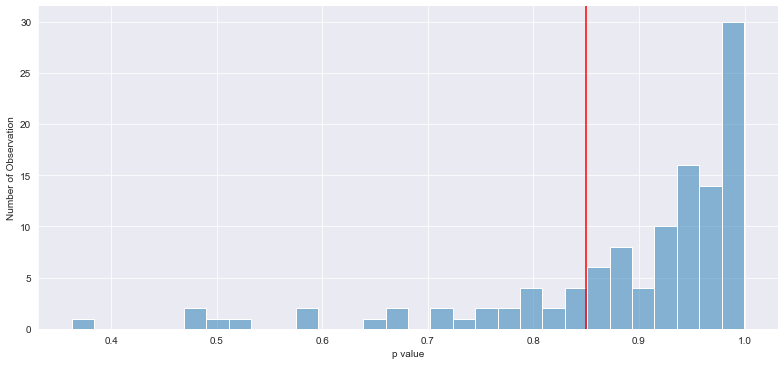

In [54]:
# Distribution of p values of zscores among events 
dis_plot = sb.displot(comp_data_eval[['median_p_val']], bins=30, legend=False, height=5, aspect=2.2)

mean, median = all_events.zscore_p_value_ARIMA.mean(), all_events.zscore_p_value_ARIMA.median()

plt.axvline(0.85, 0,400, color='r')
#plt.axvline(median, 0,400, color='r')

#plt.legend(title='Distribution of p values of Events', loc='upper left', labels=[f'Mean of p values: {"{:.2f}".format(mean)}', f'Median of p values: {"{:.2f}".format(median)}'])
dis_plot.set(xlabel='p value', ylabel='Number of Observation')
plt.show(dis_plot)

# Zscore of Events

percentage of events displying a significant outbreak in the interest data


In [3]:
all_events= all_events.loc[all_events.Event.isna()]

In [55]:
"{0:.0%}".format(len(all_events.loc[all_events.zscore_p_value_ARIMA > 0.95])/len(all_events)), "{0:.0%}".format(len(all_events.loc[all_events.zscore_p_value_ARIMA > 0.9])/len(all_events)), "{0:.0%}".format(len(all_events.loc[all_events.zscore_p_value_ARIMA > 0.85])/len(all_events))

('51%', '59%', '65%')

In [56]:
"{:.2f}".format(all_events.Magnitute_Arima.mean()), "{:.2f}".format(all_events.zscore_p_value_ARIMA.median())

('1.99', '0.96')

In [57]:
randome = all_events.loc[(all_events.Magnitute_Arima < 0)].comp_name.unique()

In [58]:
lowest = 20
np.sum([name in randome for name in comp_data_eval.sort_values(by='median_p_val').head(lowest).Name.values])/lowest

0.9

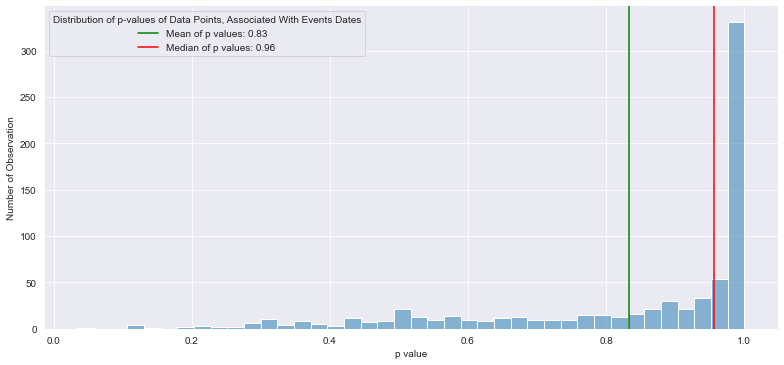

In [12]:
# Distribution of p values of zscores among events 
dis_plot = sb.displot(all_events[['zscore_p_value_ARIMA']], bins=40, legend=False, height=5, aspect=2.2)

mean, median = all_events.zscore_p_value_ARIMA.mean(), all_events.zscore_p_value_ARIMA.median()

plt.axvline(mean, 0,400, color='g')
plt.axvline(median, 0,400, color='r')

plt.legend(title='Distribution of p-values of Data Points, Associated With Events Dates', loc='upper left', labels=[f'Mean of p values: {"{:.2f}".format(mean)}', f'Median of p values: {"{:.2f}".format(median)}'])
dis_plot.set(xlabel='p value', ylabel='Number of Observation')
plt.show(dis_plot)

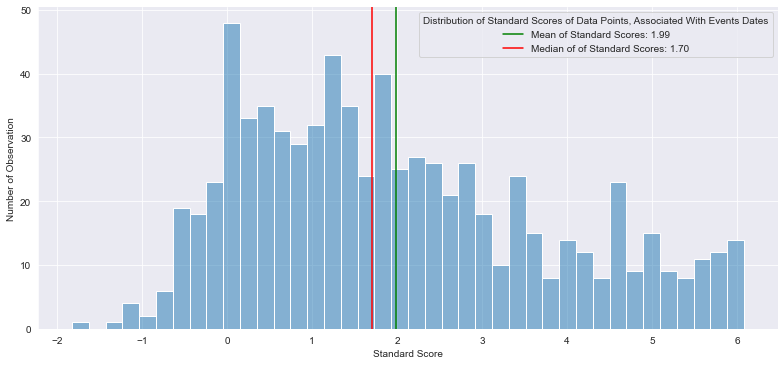

In [22]:
# Distribution of p values of zscores among events 
dis_plot = sb.displot(all_events[['Magnitute_Arima']], bins=40, legend=False, height=5, aspect=2.2)

mean, median = all_events.Magnitute_Arima.mean(), all_events.Magnitute_Arima.median()

plt.axvline(mean, 0,400, color='g')
plt.axvline(median, 0,400, color='r')

plt.legend(title='Distribution of Standard Scores of Data Points, Associated With Events Dates', loc='upper right', labels=[f'Mean of Standard Scores: {"{:.2f}".format(mean)}', f'Median of of Standard Scores: {"{:.2f}".format(median)}'])
dis_plot.set(xlabel='Standard Score', ylabel='Number of Observation')
plt.show(dis_plot)

In [23]:
dis_plot.savefig("/Users/erichganz/Documents/Master Thesis/Visual/stdvalsevents.png") 

In [62]:
commonn = ['Unattributed VC',
           'Loan', 'Grant',
           'Incubator/Accelerator',  'Incubator/Accelerator - II',
           'Seed',
           'Seed VC', 'Seed VC - II',
           'Series A', 'Series A - II', 'Series A - III', 
           'Series B', 'Series B - II',
           'Series C', 'Series C - II',
           'Series D',
           'Series E',
           'Acquired', 'IPO']

In [63]:
latex = pd.DataFrame(commonn, columns=['Event'])
latex['Observations']     = [len(all_events.loc[all_events.Funding == series]) for series in commonn]
latex['Avg. Std.']        = ["{:.2f}".format(all_events.loc[all_events.Funding == series].Magnitute_Arima.mean()) for series in commonn]
latex['Med. p.']          = ["{:.2f}".format(all_events.loc[all_events.Funding == series].zscore_p_value_ARIMA.median()) for series in commonn]
latex['Significance 5%']  = ["{0:.0%}".format(len(all_events.loc[(all_events.Funding == series) & (all_events.zscore_p_value_ARIMA > 0.95)])/len(all_events.loc[all_events.Funding == series])) for series in commonn]
latex['Significance 10%'] = ["{0:.0%}".format(len(all_events.loc[(all_events.Funding == series) & (all_events.zscore_p_value_ARIMA > 0.9)])/len(all_events.loc[all_events.Funding == series])) for series in commonn]
latex['Significance 15%'] = ["{0:.0%}".format(len(all_events.loc[(all_events.Funding == series) & (all_events.zscore_p_value_ARIMA > 0.85)])/len(all_events.loc[all_events.Funding == series])) for series in commonn]

In [64]:
latex.set_index(latex.Event, inplace=True)
latex.drop('Event', axis = 1, inplace=True)

In [65]:
latex

,Observations,Avg. Std.,Med. p.,Significance 5%,Significance 10%,Significance 15%
Event,,,,,,
Unattributed VC,12,0.72,0.73,25%,33%,33%
Loan,14,0.75,0.77,7%,7%,29%
Grant,10,1.14,0.76,40%,40%,40%
Incubator/Accelerator,31,0.80,0.70,29%,32%,39%
Incubator/Accelerator - II,17,1.07,0.86,18%,35%,59%
Seed,22,1.54,0.87,32%,45%,50%
Seed VC,65,2.03,0.95,51%,58%,65%
Seed VC - II,16,1.38,0.81,25%,25%,44%
Series A,111,2.36,0.99,57%,65%,71%


In [66]:
latex.to_latex('/Users/erichganz/Documents/Master Thesis/Tables/CommonEventsPvalueZscore.tex')

/var/folders/95/03l6lh_j2fj5qfcb_7_xdn5w0000gn/T/ipykernel_15112/2535747251.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex.to_latex('/Users/erichganz/Documents/Master Thesis/Tables/CommonEventsPvalueZscore.tex')


Significant events at alpha = 15%

In [38]:
significant_events   = all_events.loc[all_events.zscore_p_value_ARIMA > 0.85]
unsignificant_events = all_events.loc[all_events.zscore_p_value_ARIMA < 0.85]

Events from companies with significance at alpha = 15%

In [47]:
sigificant_comps = comp_data_eval.loc[(comp_data_eval.mean_p_val_of_top_ARIMA > 0.85) & (comp_data_eval.median_p_val > 0.90)]

In [48]:
# percentage of companies displying on avarage a significant outbreak from their VC events in the interest data
len(sigificant_comps)/len(comp_data_eval)

0.6434782608695652

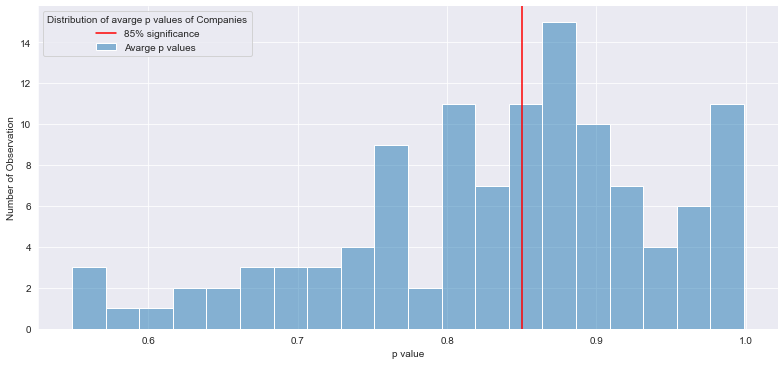

In [49]:
# Dist of mean p values for all companies
dis_plot = sb.displot(comp_data_eval[['mean_pvalue_zscore_ARIMA']], bins=20, legend=False, height=5, aspect=2.2)
plt.axvline(0.85, 0,18, color='r')
plt.legend(title='Distribution of avarge p values of Companies', loc='upper left', labels=["85% significance", 'Avarge p values'])
dis_plot.set(xlabel='p value', ylabel='Number of Observation')
plt.show(dis_plot)

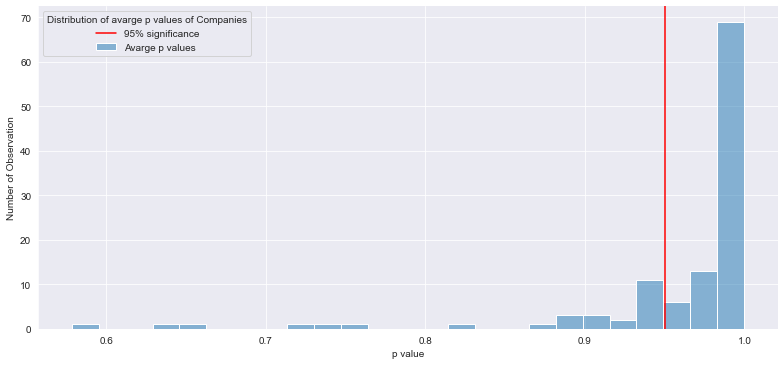

In [50]:
# Dist of top p values for all companies

dis_plot = sb.displot(comp_data_eval[['mean_p_val_of_top']], bins=25, legend=False, height=5, aspect=2.2)
plt.axvline(0.95, 0,18, color='r')
plt.legend(title='Distribution of avarge p values of Companies', loc='upper left', labels=["95% significance", 'Avarge p values'])
dis_plot.set(xlabel='p value', ylabel='Number of Observation')
plt.show(dis_plot)

In [51]:
events_sig_comps = all_events.loc[all_events.comp_name.isin(sigificant_comps.Name.values)]

In [52]:
# percentage of events from significant companies relative to all significant events
events_sig_comps.loc[events_sig_comps.zscore_p_value > .85].shape[0]/significant_events.shape[0]

0.771255060728745

In [53]:
# percentage of significant events in the group of companies with sinificant events on avarage
events_sig_comps.loc[events_sig_comps.zscore_p_value > .85].shape[0]/events_sig_comps.shape[0]

0.7775510204081633

Analyse magnitue distributions among events

In [613]:
randome_comp = all_events.loc[all_events.Magnitute_Arima < 0].comp_name.unique().tolist()

In [753]:
bad_companies = comp_data_eval.loc[comp_data_eval.mean_pvalue_zscore_ARIMA < .75].Name.tolist()
bad_companies

['Affirm',
 'AiCure',
 'ALICE Technologies',
 'Anodot',
 'Behavox',
 'BUILT Robotics',
 'CognitiveScale',
 'ExaWizards',
 'Hacarus',
 'Healthyio',
 'Inceptio Technology',
 'Mapillary',
 'MEGVII',
 'Primer',
 'Sift',
 'Sportlogiq',
 'StormForge',
 'Subtle Medical',
 'Tachyus',
 'Theator',
 'UBTECH Robotics',
 'Zestyai']

In [743]:
np.sum([comp in randome_comp for comp in bad_companies])/len(bad_companies)

0.9545454545454546

In [744]:
len(randome_comp)/len(comp_data_eval)

0.48695652173913045

In [821]:
test = all_events.loc[ (all_events.comp_name.isin(bad_companies) & (all_events.Event.isna()))]

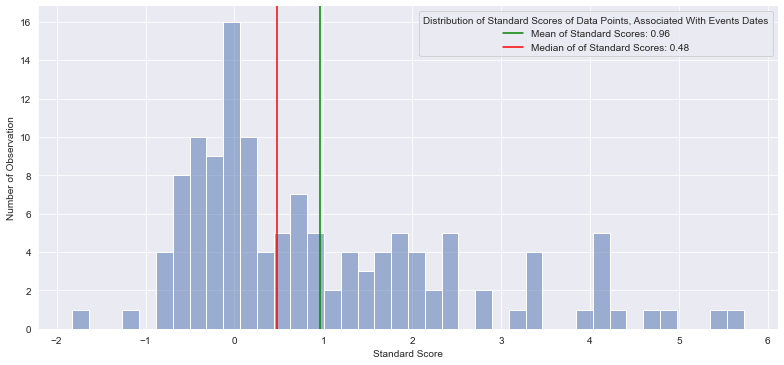

In [822]:
# Distribution of p values of zscores among events 
dis_plot = sb.displot(test[['Magnitute_Arima']], bins=40, legend=False, height=5, aspect=2.2)

mean, median = test.Magnitute_Arima.mean(), test.Magnitute_Arima.median()

plt.axvline(mean, 0,400, color='g')
plt.axvline(median, 0,400, color='r')

plt.legend(title='Distribution of Standard Scores of Data Points, Associated With Events Dates', loc='upper right', labels=[f'Mean of Standard Scores: {"{:.2f}".format(mean)}', f'Median of of Standard Scores: {"{:.2f}".format(median)}'])
dis_plot.set(xlabel='Standard Score', ylabel='Number of Observation')
plt.show(dis_plot)

In [747]:
dis_plot.savefig("/Users/erichganz/Documents/Master Thesis/Visual/nonresponsivcompanies.png") 

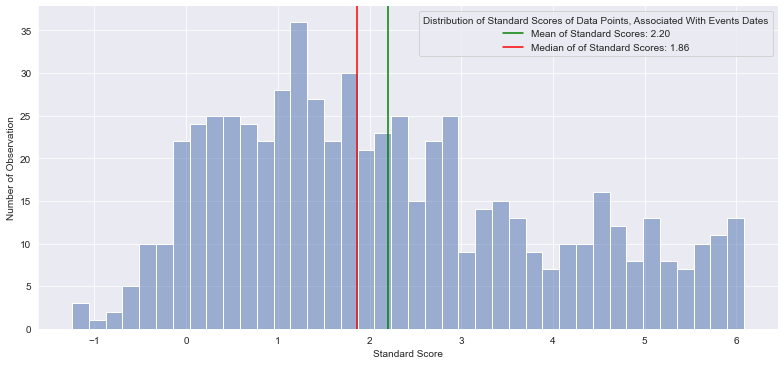

In [708]:
# Distribution of p values of zscores among events 
dis_plot = sb.displot(test[['Magnitute_Arima']], bins=40, legend=False, height=5, aspect=2.2)

mean, median = test.Magnitute_Arima.mean(), test.Magnitute_Arima.median()

plt.axvline(mean, 0,400, color='g')
plt.axvline(median, 0,400, color='r')

plt.legend(title='Distribution of Standard Scores of Data Points, Associated With Events Dates', loc='upper right', labels=[f'Mean of Standard Scores: {"{:.2f}".format(mean)}', f'Median of of Standard Scores: {"{:.2f}".format(median)}'])
dis_plot.set(xlabel='Standard Score', ylabel='Number of Observation')
plt.show(dis_plot)

# Chow Test for Structural Changes

In [1062]:
test = all_events.loc[~ all_events.p_val_inter.isna() & all_events.Event.isna()]

## Intercept

In [1045]:
gosig = test.loc[test.zscore_p_value_ARIMA > 0.95]
unsig = test.loc[test.zscore_p_value_ARIMA <= 0.95]

In [939]:
print(len(test.loc[(test.p_val_inter < 0.01)]), len(test.loc[(test.p_val_inter < 0.05)]), len(test.loc[(test.p_val_inter < 0.1)]))
print(len(test.loc[(test.p_val_slop < 0.01)]), len(test.loc[(test.p_val_slop < 0.05)]), len(test.loc[(test.p_val_slop < 0.1)]))
print(len(test.loc[(test.p_val_inter_b < 0.01) & (test.p_val_slop_b < 0.01)]), len(test.loc[(test.p_val_inter_b < 0.05) & (test.p_val_slop_b < 0.05)]), len(test.loc[(test.p_val_inter_b < 0.1) & (test.p_val_slop_b < 0.1)]))

49 101 133
88 146 201
12 37 61


In [937]:
print(len(unsig.loc[(unsig.p_val_inter < 0.01)]), len(unsig.loc[(unsig.p_val_inter < 0.05)]), len(unsig.loc[(unsig.p_val_inter < 0.1)]))
print(len(unsig.loc[(unsig.p_val_slop < 0.01)]), len(unsig.loc[(unsig.p_val_slop < 0.05)]), len(unsig.loc[(unsig.p_val_slop < 0.1)]))
print(len(unsig.loc[(unsig.p_val_inter_b < 0.01) & (unsig.p_val_slop_b < 0.01)]), len(unsig.loc[(unsig.p_val_inter_b < 0.05) & (unsig.p_val_slop_b < 0.05)]), len(unsig.loc[(unsig.p_val_inter_b < 0.1) & (unsig.p_val_slop_b < 0.1)]))

13 37 49
33 58 85
3 13 26


In [1046]:
print(len(gosig.loc[(gosig.p_val_inter < 0.01)]), len(gosig.loc[(gosig.p_val_inter < 0.05)]), len(gosig.loc[(gosig.p_val_inter < 0.1)]))
print(len(gosig.loc[(gosig.p_val_slop < 0.01)]), len(gosig.loc[(gosig.p_val_slop < 0.05)]), len(gosig.loc[(gosig.p_val_slop < 0.1)]))
print(len(gosig.loc[(gosig.p_val_inter_b < 0.005) & (gosig.p_val_slop_b < 0.005)]), len(gosig.loc[(gosig.p_val_inter_b < 0.05) & (gosig.p_val_slop_b < 0.05)]), len(gosig.loc[(gosig.p_val_inter_b < 0.1) & (gosig.p_val_slop_b < 0.1)]))

36 64 84
55 88 116
7 24 35


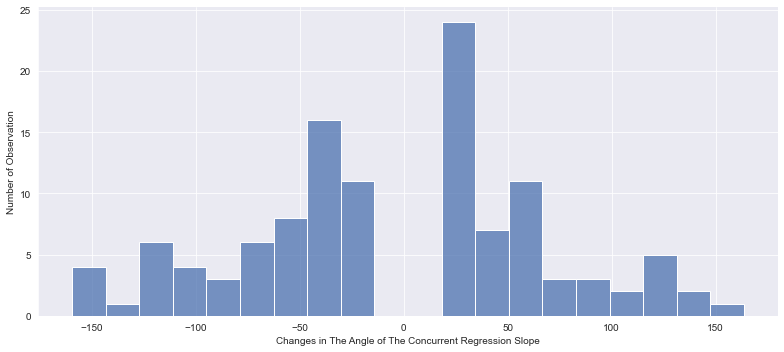

In [1159]:
# Distribution of p values of zscores among events 
dis_plot = sb.displot(gosig.loc[(gosig.p_val_slop < 0.15) & (~gosig.change_slope.between(-15,18)), 'change_slope'], bins=20, legend=False, height=5, aspect=2.2)

#mean, median = all_events.zscore_p_value_ARIMA.mean(), all_events.zscore_p_value_ARIMA.median()

#plt.axvline(mean, 0,400, color='g')
#plt.axvline(median, 0,400, color='r')

dis_plot.set(xlabel='Changes in The Angle of The Concurrent Regression Slope', ylabel='Number of Observation')
plt.show(dis_plot)

In [1168]:
all_events.loc[['Angel' in round for round in all_events.Funding.values]]

,Funding,Event,Amount,Valuation,Sources,Investors,Link,Magnitute,pickedValues,picked_date,comp_name,Magnitute_Arima,p_val_con,p_val_slop,p_val_con_d,p_val_slop_d,event_id,zscore_p_value,zscore_p_value_ARIMA,key
Date,,,,,,,,,,,,,,,,,,,,
2020-01-01,Angel,NaN,NaN,Adam Morley,NaN,1,NaN,3.000971,25.384781,2020-01-05,Automation Anywhere,0.207729,NaN,NaN,NaN,NaN,Event 5,0.998654,0.582280,107
2015-10-02,Angel,NaN,1.0,9.0,Undisclosed Angel Investors,1,NaN,-0.851898,-26.968750,2015-09-20,Behavox,-0.749794,4.615191e-01,0.705608,0.686308,0.007516,Event 2,0.197135,0.226689,122
2020-01-01,Angel - II,NaN,0.08,NaN,1.0,St. Louis Arch Angels,NaN,-0.137387,-8.708160,2019-12-29,Benson Hill,-0.308214,8.653156e-10,0.085272,0.887778,0.018980,Event 14,0.445362,0.378960,126
2018-02-27,Angel,NaN,NaN,NaN,1.0,St. Louis Arch Angels,NaN,2.068240,31.296340,2018-03-04,Benson Hill,1.742553,3.370413e-06,0.702118,0.007309,0.587537,Event 11,0.980691,0.959294,129
2016-04-06,Angel,NaN,NaN,NaN,4,NaN,NaN,0.320269,9.221154,2016-04-03,Horizon Robotics,-0.667226,NaN,NaN,NaN,NaN,Event 3,0.625618,0.252314,328


## Legacy

In [1137]:
outcomes = ['Coincident', 'Parallel', 'Concurent', 'Dissimilar']
latex = pd.DataFrame(outcomes, columns=['Regression'])

sig         = 0.05
chow_events = all_events.loc[all_events.Event.isna() & ~ all_events.p_val_con.isna() & (all_events.zscore_p_value_ARIMA > 1-sig)]

sig         = 0.01
Parallel    = chow_events.loc[  (chow_events.p_val_con_d < sig)  &   (chow_events.p_val_slop_d >= sig)]
Coincident  = chow_events.loc[   (chow_events.p_val_con_d >= sig)  &   (chow_events.p_val_slop_d >= sig)]
Concurent   = chow_events.loc[   (chow_events.p_val_con_d >= sig)  &  (chow_events.p_val_slop_d < sig)]
Dissimilar  = chow_events.loc[  (chow_events.p_val_con_d < sig)  &  (chow_events.p_val_slop_d < sig)]
est = Concurent


latex['Sig. 1\%' ] = [len(Coincident), len(Parallel), len(Concurent), len(Dissimilar)]

sig         = 0.05
Coincident  = chow_events.loc[   (chow_events.p_val_con_d >= sig)  &   (chow_events.p_val_slop_d >= sig)]
Parallel    = chow_events.loc[  (chow_events.p_val_con_d < sig)  &   (chow_events.p_val_slop_d >= sig)]
Concurent   = chow_events.loc[   (chow_events.p_val_con_d >= sig)  &  (chow_events.p_val_slop_d < sig)]
Dissimilar  = chow_events.loc[  (chow_events.p_val_con_d < sig)  &  (chow_events.p_val_slop_d < sig)]

latex['Sig. 5\%'] = [len(Coincident), len(Parallel), len(Concurent), len(Dissimilar)]

sig         = 0.10
Coincident  = chow_events.loc[   (chow_events.p_val_con_d >= sig)  &   (chow_events.p_val_slop_d >= sig)]
Parallel    = chow_events.loc[  (chow_events.p_val_con_d < sig)  &   (chow_events.p_val_slop_d >= sig)]
Concurent   = chow_events.loc[   (chow_events.p_val_con_d >= sig)  &  (chow_events.p_val_slop_d < sig)]
Dissimilar  = chow_events.loc[  (chow_events.p_val_con_d < sig)  &  (chow_events.p_val_slop_d < sig)]

latex['Sig. 10\%'] = [len(Coincident), len(Parallel), len(Concurent), len(Dissimilar)]
len(chow_events)

sig         = 0.05
chow_events = all_events.loc[all_events.Event.isna() & ~ all_events.p_val_con.isna() & (all_events.zscore_p_value_ARIMA <= 1-sig)]

sig         = 0.01
Parallel    = chow_events.loc[  (chow_events.p_val_con_d < sig)  &   (chow_events.p_val_slop_d >= sig)]
Coincident  = chow_events.loc[   (chow_events.p_val_con_d >= sig)  &   (chow_events.p_val_slop_d >= sig)]
Concurent   = chow_events.loc[   (chow_events.p_val_con_d >= sig)  &  (chow_events.p_val_slop_d < sig)]
Dissimilar  = chow_events.loc[  (chow_events.p_val_con_d < sig)  &  (chow_events.p_val_slop_d < sig)]


latex['Sig. 1\% ' ] = [len(Coincident), len(Parallel), len(Concurent), len(Dissimilar)]

sig         = 0.05
Coincident  = chow_events.loc[   (chow_events.p_val_con_d >= sig)  &   (chow_events.p_val_slop_d >= sig)]
Parallel    = chow_events.loc[  (chow_events.p_val_con_d < sig)  &   (chow_events.p_val_slop_d >= sig)]
Concurent   = chow_events.loc[   (chow_events.p_val_con_d >= sig)  &  (chow_events.p_val_slop_d < sig)]
Dissimilar  = chow_events.loc[  (chow_events.p_val_con_d < sig)  &  (chow_events.p_val_slop_d < sig)]

latex['Sig. 5\% '] = [len(Coincident), len(Parallel), len(Concurent), len(Dissimilar)]

sig         = 0.10
Coincident  = chow_events.loc[   (chow_events.p_val_con_d >= sig)  &   (chow_events.p_val_slop_d >= sig)]
Parallel    = chow_events.loc[  (chow_events.p_val_con_d < sig)  &   (chow_events.p_val_slop_d >= sig)]
Concurent   = chow_events.loc[   (chow_events.p_val_con_d >= sig)  &  (chow_events.p_val_slop_d < sig)]
Dissimilar  = chow_events.loc[  (chow_events.p_val_con_d < sig)  &  (chow_events.p_val_slop_d < sig)]

latex['Sig. 10\% '] = [len(Coincident), len(Parallel), len(Concurent), len(Dissimilar)]
len(chow_events)

latex

,Regression,Sig. 1\%,Sig. 5\%,Sig. 10\%,Sig. 1\%,Sig. 5\%,Sig. 10\%
0,Coincident,231,167,133,225,185,162
1,Parallel,13,34,45,10,26,27
2,Concurent,43,65,77,22,39,37
3,Dissimilar,6,27,38,1,8,32


In [1138]:
est[['comp_name','Funding']]

,comp_name,Funding
Date,,
2011-07-19,Affectiva,Series B
2015-05-06,Affirm,Series C
2017-04-14,Afiniti,Series D
2017-06-08,Algolia,Series B
2017-06-23,Algorithmia,Series A
2021-03-30,Appier,IPO
2015-11-03,Appier,Series B
2014-06-18,Appier,Series A
2020-03-17,Babylon Health,Incubator/Accelerator - II


In [1127]:
latex.set_index(latex.Regression, inplace=True)
latex.drop('Regression', axis = 1, inplace=True)
latex.to_latex('/Users/erichganz/Documents/Master Thesis/Tables/StructuralOucomes.tex')

/var/folders/95/03l6lh_j2fj5qfcb_7_xdn5w0000gn/T/ipykernel_53085/106454144.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex.to_latex('/Users/erichganz/Documents/Master Thesis/Tables/StructuralOucomes.tex')


# Variance Testing

In [115]:
check = all_events.loc[all_events.Event.isna()] # (check.F_test_p_value_ARIMAresid_TPadjusted < 0.05) & (check.Levene_p_value_ARIMAresid_TPadjusted< 0.05) &
check = check[ (check.Bartlett_p_value_ARIMAresid_TPadjusted < 0.05)] 

In [562]:
common_event_num = ['Event 1', 'Event 2', 'Event 3', 'Event 4', 'Event 5', 'Event 6', 'Event 7', 'Event 8'] #, 'Event 9', 'Event 10', 'Event 11']

In [107]:
len(check)/len(all_events)

0.2572178477690289

In [563]:
(check.loc[check.event_id.isin(common_event_num)].event_id.value_counts()/all_events.loc[all_events.event_id.isin(common_event_num)].event_id.value_counts()).sort_values()

NameError: name 'check' is not defined

In [522]:
common_event_num = [
           'Seed VC',
           'Series A',
           'Series B', 
           'Series C',
           'Series D']

In [582]:
common_event_num = ['Event 1', 'Event 2', 'Event 3', 'Event 4', 'Event 5', 'Event 6', 'Event 7', 'Event 8']

In [583]:
all_events = all_events.loc[(all_events.Event.isna()) & (all_events.zscore_p_value_ARIMA > 0.95)]

In [585]:
latex = pd.DataFrame(common_event_num, columns=['Event'])
latex['Observations']     = [len(all_events.loc[all_events.event_id == event]) for event in common_event_num]

sig = 0.05
latex

,Event,Observations
0,Event 1,55
1,Event 2,54
2,Event 3,59
3,Event 4,54
4,Event 5,46
5,Event 6,37
6,Event 7,30
7,Event 8,22


In [586]:
latex['em'] = ['' for event in common_event_num]

latex['Levene5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted < 0.05)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['Levene10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted < 0.1)]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]

latex['em1'] = ['' for event in common_event_num]
latex['Bartlett5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted < 0.05)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['Bartlett10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted < 0.1)]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]

latex['em2'] = ['' for event in common_event_num]

latex['F_test5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted < 0.05)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['F_test10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted < 0.1)]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]

latex['em3'] = ['' for event in common_event_num]

latex['F_test5 back']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted > 1- 0.05)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['F_test10 back']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted > 1- 0.1)]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]

latex1=latex
latex1

,Event,Observations,em,Levene5,Levene10,em1,Bartlett5,Bartlett10,em2,F_test5,F_test10,em3,F_test5 back,F_test10 back
0,Event 1,55,,53%,56%,,53%,58%,,58%,62%,,0%,2%
1,Event 2,54,,31%,37%,,41%,52%,,46%,50%,,6%,7%
2,Event 3,59,,20%,32%,,34%,41%,,27%,36%,,10%,12%
3,Event 4,54,,13%,15%,,24%,30%,,19%,26%,,9%,9%
4,Event 5,46,,9%,20%,,15%,20%,,13%,22%,,9%,9%
5,Event 6,37,,8%,8%,,24%,32%,,19%,24%,,14%,16%
6,Event 7,30,,10%,10%,,13%,20%,,17%,27%,,3%,3%
7,Event 8,22,,18%,23%,,14%,14%,,14%,18%,,0%,5%


In [587]:
latex.set_index(latex.Event, inplace=True)
latex.drop('Event', axis = 1, inplace=True)
latex.to_latex('/Users/erichganz/Documents/Master Thesis/Tables/test2.tex')

/var/folders/95/03l6lh_j2fj5qfcb_7_xdn5w0000gn/T/ipykernel_53085/2895165777.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex.to_latex('/Users/erichganz/Documents/Master Thesis/Tables/test2.tex')


In [510]:
latex['em'] = ['' for event in common_event_num]

latex['Levene5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted < 0.05)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['Levene10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted < 0.1)]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]

latex['em1'] = ['' for event in common_event_num]

latex['Bartlett5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted < 0.05)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['Bartlett10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted < 0.1)]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]

latex['em2'] = ['' for event in common_event_num]

latex['F_test5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted < 0.05)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['F_test10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted < 0.1)]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]

latex['em3'] = ['' for event in common_event_num]

latex['F_test5 back']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted > 1- 0.05)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['F_test10 back']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted > 1- 0.1)]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]

latex1=latex
latex1

,Event,Observations,em,Levene5,Levene10,em1,Bartlett5,Bartlett10,em2,F_test5,F_test10,em3,F_test5 back,F_test10 back
0,Event 1,57,,61%,67%,,67%,68%,,63%,65%,,5%,11%
1,Event 2,63,,43%,48%,,56%,62%,,54%,60%,,6%,8%
2,Event 3,66,,23%,32%,,42%,47%,,36%,42%,,9%,12%
3,Event 4,60,,20%,30%,,43%,50%,,32%,37%,,18%,20%
4,Event 5,51,,18%,31%,,25%,33%,,22%,24%,,12%,18%
5,Event 6,45,,20%,27%,,31%,40%,,16%,22%,,24%,24%
6,Event 7,30,,13%,23%,,30%,37%,,33%,37%,,3%,13%
7,Event 8,28,,11%,36%,,18%,25%,,21%,32%,,4%,14%


In [278]:
latex['Levene5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted < 0.05)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['Levene10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted < 0.1)]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]
latex['Levene15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted < 0.15)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]

latex['Bartlett5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted < 0.05)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['Bartlett10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted < 0.1)]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]
latex['Bartlett15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted < 0.15)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]

latex['F_test5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted < 0.05)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['F_test10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted < 0.1)]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]
latex['F_test15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted < 0.15)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]

latex1=latex
latex1

,Event,Observations,Levene5,Levene10,Levene15,Bartlett5,Bartlett10,Bartlett15,F_test5,F_test10,F_test15
0,Event 1,72,57%,60%,65%,64%,65%,68%,61%,62%,67%
1,Event 2,70,43%,47%,53%,56%,63%,69%,51%,57%,59%
2,Event 3,67,24%,34%,43%,42%,48%,55%,36%,42%,46%
3,Event 4,61,15%,21%,31%,41%,51%,54%,30%,38%,39%
4,Event 5,63,19%,32%,37%,30%,38%,43%,27%,32%,38%
5,Event 6,48,21%,29%,35%,35%,40%,42%,10%,17%,25%
6,Event 7,34,12%,29%,32%,26%,41%,44%,32%,35%,41%
7,Event 8,25,4%,28%,32%,8%,16%,28%,16%,28%,32%


In [265]:
latex.set_index(latex.Event, inplace=True)
latex.drop('Event', axis = 1, inplace=True)
latex.to_latex('/Users/erichganz/Documents/Master Thesis/Tables/VarianceScores.tex')

/var/folders/95/03l6lh_j2fj5qfcb_7_xdn5w0000gn/T/ipykernel_53085/1556492539.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex.to_latex('/Users/erichganz/Documents/Master Thesis/Tables/VarianceScores.tex')


In [282]:
latex['Levene5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted < 0.05)]) / len(all_events.loc[all_events.Funding == event]) ) for event in common_event_num]
latex['Levene10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted < 0.1)]) / len(all_events.loc[all_events.Funding == event]) )  for event in common_event_num]
latex['Levene15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted < 0.15)]) / len(all_events.loc[all_events.Funding == event]) ) for event in common_event_num]

latex['Bartlett5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted < 0.05)]) / len(all_events.loc[all_events.Funding == event]) ) for event in common_event_num]
latex['Bartlett10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted < 0.1)]) / len(all_events.loc[all_events.Funding == event]) )  for event in common_event_num]
latex['Bartlett15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted < 0.15)]) / len(all_events.loc[all_events.Funding == event]) ) for event in common_event_num]

latex['F_test5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted < 0.05)]) / len(all_events.loc[all_events.Funding == event]) ) for event in common_event_num]
latex['F_test10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted < 0.1)]) / len(all_events.loc[all_events.Funding == event]) )  for event in common_event_num]
latex['F_test15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted < 0.15)]) / len(all_events.loc[all_events.Funding == event]) ) for event in common_event_num]

latex2 = latex
latex2

,Event,Observations,Levene5,Levene10,Levene15,Bartlett5,Bartlett10,Bartlett15,F_test5,F_test10,F_test15
0,Seed VC,41,51%,54%,56%,59%,68%,71%,59%,61%,61%
1,Series A,70,46%,50%,59%,59%,60%,63%,54%,56%,61%
2,Series B,64,25%,34%,39%,36%,45%,50%,28%,38%,42%
3,Series C,51,18%,33%,37%,39%,41%,41%,27%,31%,43%
4,Series D,28,11%,18%,25%,32%,39%,43%,21%,29%,36%


In [259]:
latex['Levene5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted > 1-0.05)]) / len(all_events.loc[all_events.Funding == event]) ) for event in common_event_num]
latex['Levene10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted > 1- 0.1)]) / len(all_events.loc[all_events.Funding == event]) )  for event in common_event_num]
latex['Levene15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted > 1-0.15)]) / len(all_events.loc[all_events.Funding == event]) ) for event in common_event_num]

latex['Bartlett5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted > 1- 0.05)]) / len(all_events.loc[all_events.Funding == event]) ) for event in common_event_num]
latex['Bartlett10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted > 1- 0.1)]) / len(all_events.loc[all_events.Funding == event]) )  for event in common_event_num]
latex['Bartlett15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted > 1- 0.15)]) / len(all_events.loc[all_events.Funding == event]) ) for event in common_event_num]

latex['F_test5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted > 1- 0.05)]) / len(all_events.loc[all_events.Funding == event]) ) for event in common_event_num]
latex['F_test10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted > 1- 0.1)]) / len(all_events.loc[all_events.Funding == event]) )  for event in common_event_num]
latex['F_test15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.Funding == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted > 1- 0.15)]) / len(all_events.loc[all_events.Funding == event]) ) for event in common_event_num]

latex4 = latex
latex4

,Event,Observations,Levene5,Levene10,Levene15,Bartlett5,Bartlett10,Bartlett15,F_test5,F_test10,F_test15
0,Seed VC,33,6%,9%,12%,3%,6%,6%,0%,3%,3%
1,Series A,63,0%,3%,3%,2%,2%,3%,6%,11%,14%
2,Series B,66,5%,6%,8%,3%,5%,5%,14%,15%,17%
3,Series C,51,4%,6%,8%,0%,4%,4%,14%,20%,24%
4,Series D,26,0%,4%,4%,4%,4%,15%,15%,15%,15%


In [260]:
latex.set_index(latex.Event, inplace=True)
latex.drop('Event', axis = 1, inplace=True)
latex.to_latex('/Users/erichganz/Documents/Master Thesis/Tables/VarianceScoreFundingEvents2.tex')

/var/folders/95/03l6lh_j2fj5qfcb_7_xdn5w0000gn/T/ipykernel_53085/3759521246.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex.to_latex('/Users/erichganz/Documents/Master Thesis/Tables/VarianceScoreFundingEvents2.tex')


In [156]:
latex['Levene5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted.between(sig/2, 1-sig/2))]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['Levene10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted.between(sig/2, 1-sig/2))]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]
latex['Levene15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted.between(sig/2, 1-sig/2))]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]

latex['Bartlett5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted.between(sig/2, 1-sig/2))]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['Bartlett10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted.between(sig/2, 1-sig/2))]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]
latex['Bartlett15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted.between(sig/2, 1-sig/2))]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]

latex['F_test5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted.between(sig/2, 1-sig/2))]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['F_test10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted.between(sig/2, 1-sig/2))]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]
latex['F_test15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted.between(sig/2, 1-sig/2))]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]

latex

In [266]:
latex['Levene5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted > 1-0.05)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['Levene10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted > 1-0.1)]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]
latex['Levene15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Levene_p_value_ARIMAresid_TPadjusted > 1-0.15)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]

latex['Bartlett5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted > 1-0.05)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['Bartlett10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted > 1-0.1)]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]
latex['Bartlett15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.Bartlett_p_value_ARIMAresid_TPadjusted > 1-0.15)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]

latex['F_test5']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted > 1-0.05)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]
latex['F_test10']   = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted > 1-0.1)]) / len(all_events.loc[all_events.event_id == event]) )  for event in common_event_num]
latex['F_test15']    = ["{0:.0%}".format( len(all_events.loc[(all_events.event_id == event) & (all_events.F_test_p_value_ARIMAresid_TPadjusted > 1-0.15)]) / len(all_events.loc[all_events.event_id == event]) ) for event in common_event_num]

latex3=  latex
latex3

,Observations,Levene5,Levene10,Levene15,Bartlett5,Bartlett10,Bartlett15,F_test5,F_test10,F_test15
Event,,,,,,,,,,
Event 1,51,6%,6%,6%,2%,2%,4%,0%,4%,6%
Event 2,54,2%,6%,7%,2%,4%,4%,6%,7%,7%
Event 3,54,6%,6%,7%,2%,4%,4%,9%,13%,13%
Event 4,55,0%,0%,2%,4%,4%,7%,18%,20%,22%
Event 5,46,4%,11%,13%,0%,4%,9%,13%,17%,20%
Event 6,37,3%,3%,3%,0%,3%,8%,22%,22%,32%
Event 7,28,0%,7%,7%,0%,0%,0%,4%,14%,18%
Event 8,24,4%,4%,4%,8%,8%,8%,4%,17%,17%


In [268]:
latex.to_latex('/Users/erichganz/Documents/Master Thesis/Tables/VarianceScore2.tex')

/var/folders/95/03l6lh_j2fj5qfcb_7_xdn5w0000gn/T/ipykernel_53085/378815051.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex.to_latex('/Users/erichganz/Documents/Master Thesis/Tables/VarianceScore2.tex')


In [549]:
all_events['Significant'] = ['Significant' if value > 0.95 else 'Unsignificant' for value in all_events.zscore_p_value_ARIMA.values]

In [551]:
all_events.reset_index(inplace=True)

In [485]:
curr = all_events.loc[all_events.Event.isna()]

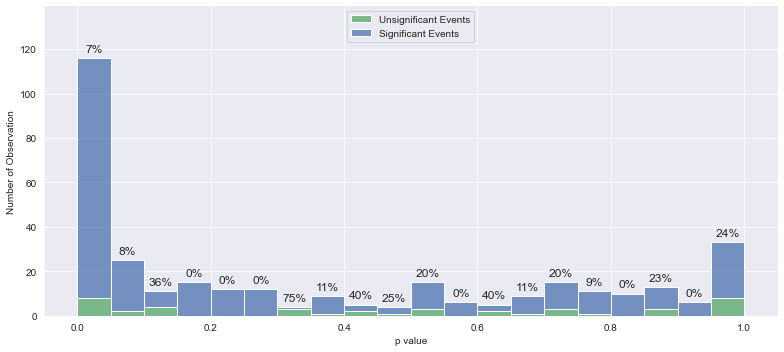

In [552]:
# Dist of top p values for all companies

dis_plot = sb.displot(all_events, x='F_test_p_value_ARIMAresid_TPadjusted', bins=20, height=5, legend=False, hue="Significant", multiple="stack", aspect=2.2)

plt.legend( loc='upper center', labels=['Unsignificant Events', "Significant Events"])
dis_plot.set(xlabel='p value', ylabel='Number of Observation')


for ax in dis_plot.axes.ravel():
    
    
    first  = [ d.get_height() for d in ax.containers[0]]
    second = [ d.get_height() for d in ax.containers[1]]
    labels = ["{0:.0%}".format(first[i]/(first[i] + second[i])) for i in range(len(first))]
    
    
    ax.bar_label(ax.containers[1], labels=labels, label_type='edge', fontsize=12, padding=4)

    ax.margins(y=0.2)


plt.show(dis_plot)

In [545]:
dis_plot.savefig("/Users/erichganz/Documents/Master Thesis/Visual/FtestPval.png") 

In [409]:
from itertools import product

In [412]:
class_order = ['Levene_p_value_ARIMAresid_TPadjusted', 'Bartlett_p_value_ARIMAresid_TPadjusted', 'F_test_p_value_ARIMAresid_TPadjusted']
hue_order =  ['Unsignificant', "Significant"]
prod = product(class_order, hue_order)

In [341]:
test = all_events.loc[(all_events.zscore_p_value_ARIMA > 0.95)]

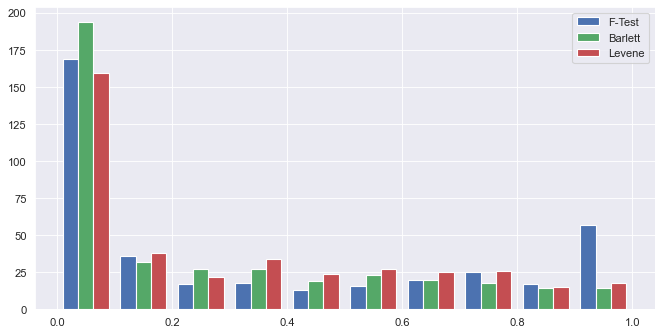

In [366]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 5), dpi=80)
plt.style.use('seaborn-deep')

fig = plt.hist(test[['F_test_p_value_ARIMAresid_TPadjusted', 'Bartlett_p_value_ARIMAresid_TPadjusted', 'Levene_p_value_ARIMAresid_TPadjusted']])
plt.legend(loc='upper right', labels=['F-Test', 'Barlett', 'Levene'])


In [1]:
1628*2

3256

# Null Values Before First Event

In [ ]:
from scipy.stats import chi2

def var_test(x, va0, direction = "two-tailed", alpha = 0.05):

    n = len(x)
    q = (n - 1) * np.std(x) / va0
    
    if direction == "left":
        
        critical = chi2.ppf(alpha, n - 1)
        if critical < q : return f'H_0 not rejected with teststat: {q} and cv: {critical}'
        else: return             f'rejected H_0 with teststat: {q} and cv: {critical}'

    elif direction == "right":

        if q > chi2.ppf(1-alpha, n - 1): return "H_0 rejected"
        else: return "H_0 not rejected"
            
    else:
        q1 = chi2.ppf(alpha / 2, n - 1)
        q2 = chi2.ppf(1 - (alpha / 2), n - 1)
        if q <= q1 or q >= q2: return "H_0 rejected"
        else: return "H_0 not rejected"

def std_test(x, std_null, alpha):

    n         = len(x)
    test_stat = (n - 1) * (np.std(x) / std_null)**2

    upper_cv = stats.chi2.ppf(1-alpha/2,  n - 1)
    lower_cv = stats.chi2.ppf(alpha,  n - 1)

    p_value = stats.chi2.cdf(test_stat,  n - 1)
    

    if test_stat < lower_cv: #or upper_cv < test_stat:

        #print(f'rejected H_0 with test_stat: {test_stat} and critical_value: {lower_cv , upper_cv}')
        print(f'p value is {p_value}. std: {np.std(x)}')
    
    else:    
                                   
        #print(f'H_0 not rejected with test_stat: {test_stat} and critical_value: {lower_cv , upper_cv}')
        print(f'p value is {p_value}. std: {np.std(x)}')

In [ ]:
collect = []

for index, comp in good_time.iterrows():

    events = pd.read_excel(f'{reg_folder}/{comp.CompanyName}.xlsx')

    print(comp.CompanyName)

    period = code_to_time(comp.gtCode, '_no_events_detrended')[f'{comp.FoundationDate}-01-01':events.Date.iloc[-1]]
    period.drop(period.tail(1).index, inplace=True)

    std_test(period.values,  0.05, alpha = 0.05)

    
    period = code_to_time(comp.gtCode, '')[f'{comp.FoundationDate}-01-01':events.Date.iloc[-1]].drop(period.tail(1).index)
    period.drop(period.tail(1).index, inplace=True)

    '''
    tstat, p = stats.ttest_1samp(period.values, popmean = 0, axis=0, nan_policy='propagate', alternative='greater')
    print(f'p value is {p[0]}. mean: {period.mean().values[-1]}')
    '''
    period = list(period[comp.gtCode])
    collect.append((np.sum([0.0 == a for a in period]), len(period)))

Percentage of data point = 0 before the first event.

In [ ]:
sum(i for i, j in collect)/sum(j for i, j in collect)

# Errors

In [286]:
def code_to_time(code, extension = ''):

    foundation = int(comp_data_eval.loc[comp_data_eval.Code == code].FoundationYear)
    if foundation   >= 2018: return timeseries_short[[f'{code}{extension}']][str(foundation) + '-01-01':]
    elif foundation >= 2015: return timeseries_middle[[f'{code}{extension}']][str(foundation) + '-01-01':]
    elif foundation >= 2012: return timeseries_long[[f'{code}{extension}']][str(foundation) + '-01-01':]
    else:                    return timeseries_very_long[[f'{code}{extension}']][str(foundation) + '-01-01':]


In [285]:
test = comp_data_eval.loc[comp_data_eval.mean_pvalue_zscore > .95]

In [248]:
test = timeseries_long.loc[timeseries_long['/g/11bzyqdcsn_resid_ARIMA']<500][['/g/11bzyqdcsn_resid_ARIMA']]

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


/Users/erichganz/Library/Python/3.8/lib/python/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


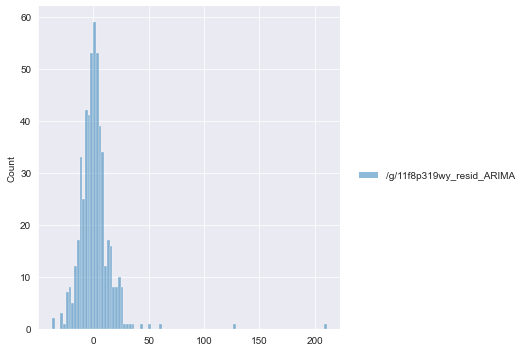

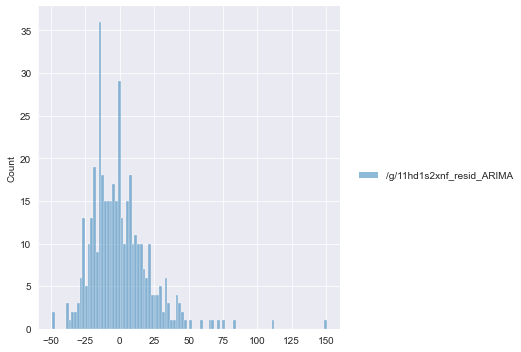

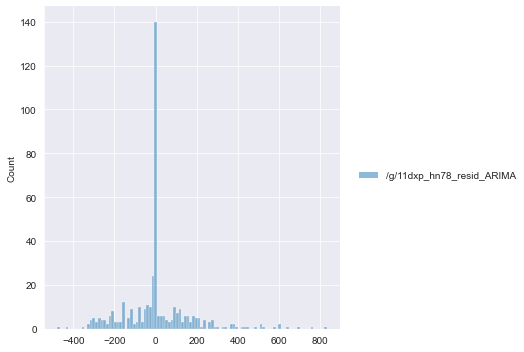

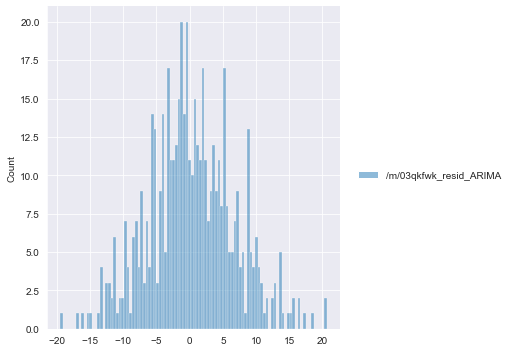

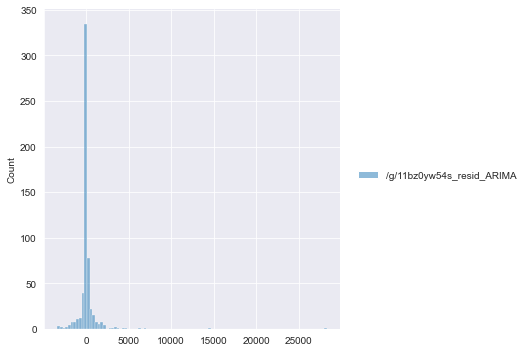

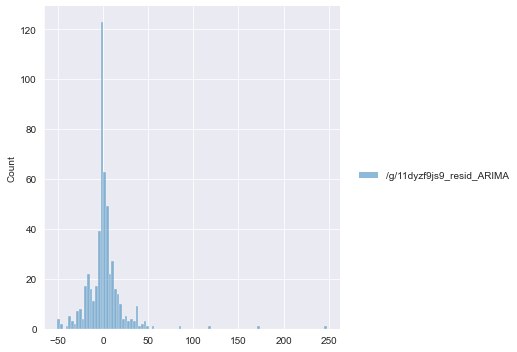

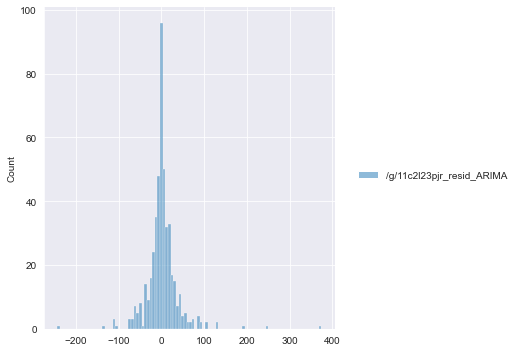

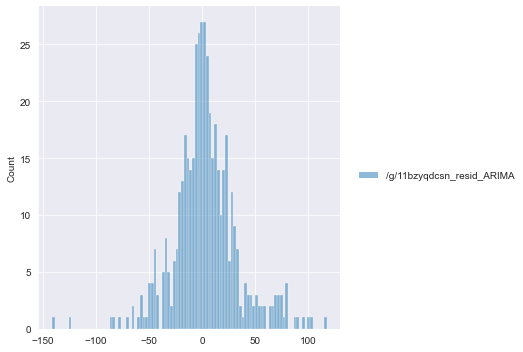

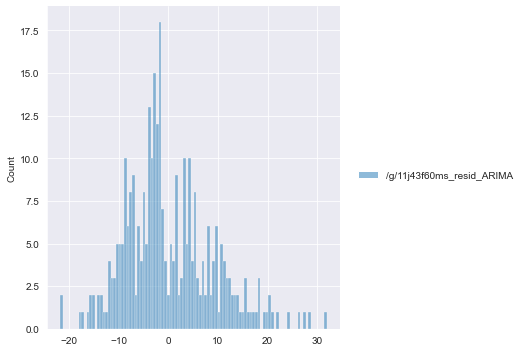

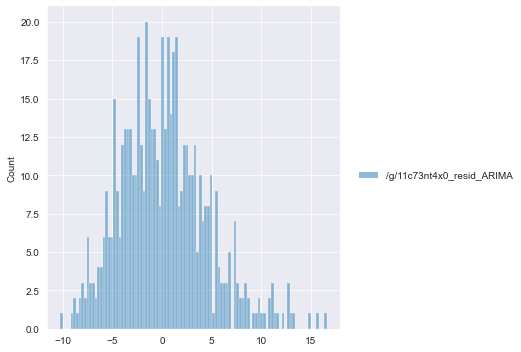

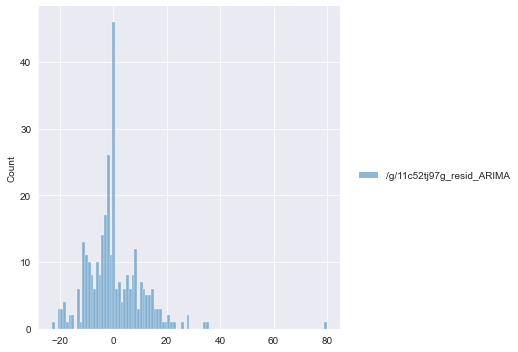

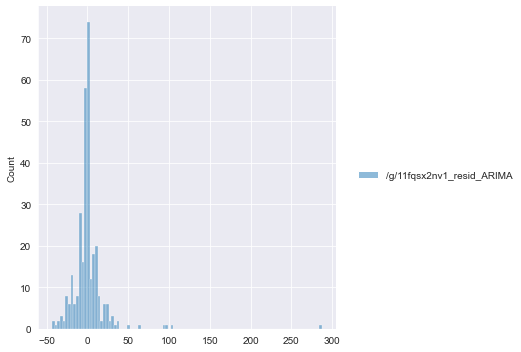

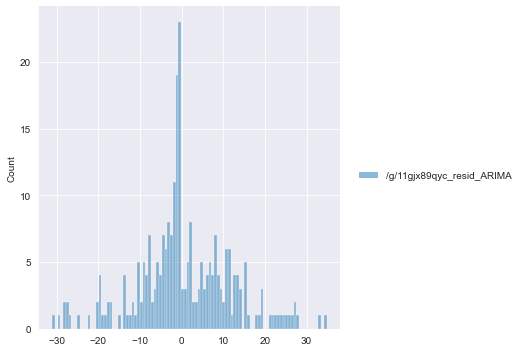

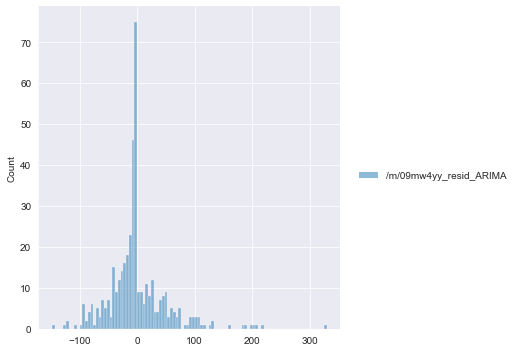

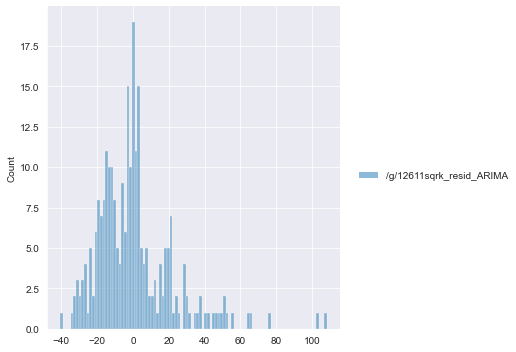

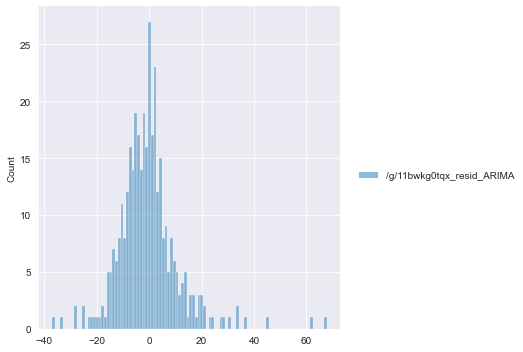

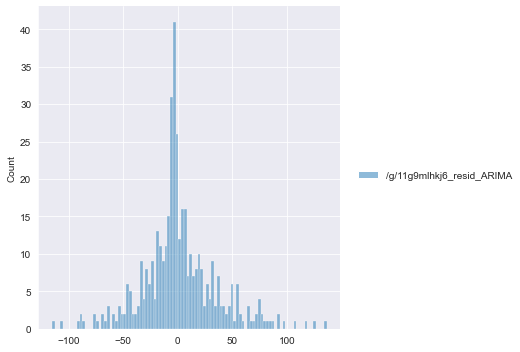

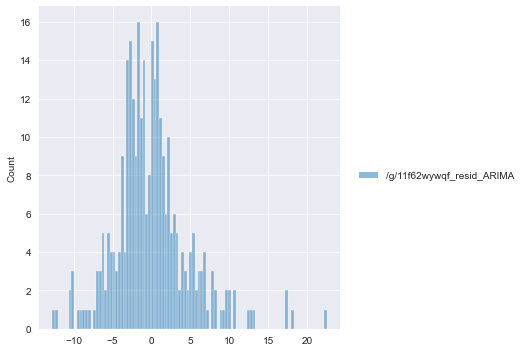

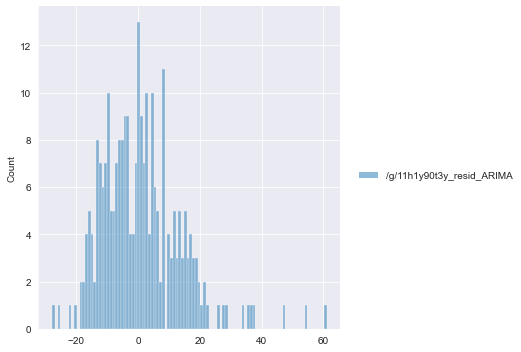

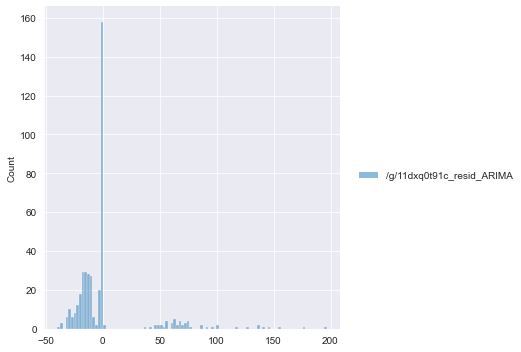

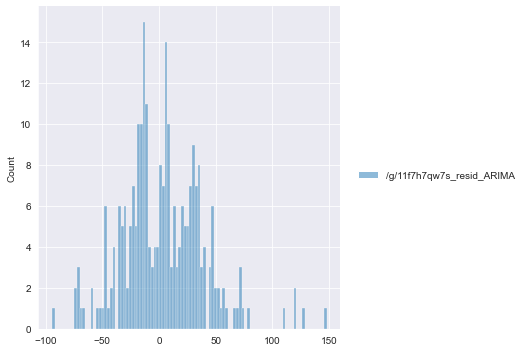

In [288]:
import seaborn as sb

for index, comp in test.iterrows():

    data = code_to_time(comp.Code, '_resid_ARIMA')


    sb.displot(data, bins=100)
    print(kstest(data, 'norm')[1])

In [234]:
from scipy.stats import kstest

In [294]:
from numpy.random import randn
data1 = randn(10000)
kstest(data1, 'norm')

KstestResult(statistic=0.008582378784778882, pvalue=0.4504054570172521)

In [282]:
kstest(test['/g/11bzyqdcsn_resid_ARIMA'], 'norm')

KstestResult(statistic=0.41475696154875563, pvalue=6.668383700313568e-90)

In [297]:
from pmdarima import auto_arima
order = auto_arima(timeseries_long['/g/11bzyqdcsn_resid_ARIMA']).order

In [299]:
timeseries_long['/g/11bzyqdcsn_no_events_detrend']

date
2011-01-02      0.000000
2011-01-09      0.000000
2011-01-16      0.000000
2011-01-23      0.000000
2011-01-30      0.000000
                 ...    
2021-11-28    -19.407859
2021-12-05     29.065458
2021-12-12     87.317412
2021-12-19    -84.880205
2021-12-26   -141.211183
Name: /g/11bzyqdcsn_resid_ARIMA, Length: 574, dtype: float64

# More

In [ ]:
for index_good_time, row in good_comps.iterrows():

    # load results
    events = pd.read_excel(f'{reg_folder}/{row.Name}.xlsx')

    amounts    = []
    valuations = []

    for index, event in events.iterrows():

        amount = ''

        if event.Amount == event.Amount:

            for sign in str(event.Amount):

                if sign.isdigit() or sign == '.':

                    amount += sign 
        
        else:

            amount = np.nan
        
        amounts.append(float(amount))

        valuation = ''

        if event.Valuation == event.Valuation:

            for sign in str(event.Valuation):

                if sign.isdigit() or sign == '.':

                    valuation += sign 
        
        else:

            valuation = np.nan
        
        valuations.append(float(valuation))

    
    events['Amount'] = amounts
    events['Valuation'] = valuations


    # Save results
    events.to_excel(f'{reg_folder}/{row.Name}.xlsx')